In [179]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import array


In [180]:
count = 0
x1 = []
x2 = []
y1 = []
y2 = []
z1 = []
z2 = []


with open('ASTR19_S22_group_project_data.txt') as f:
    lines = f.readlines()[3:]
    
    x = [int(line.split()[0]) for line in lines]
    y = [line.split()[1] for line in lines]
    z = [float(line.split()[2]) for line in lines]

    #separating array from first/second tide measurments
    for item in x:
        if count == 0:
            x1.append(item)
            count = 1
        else:
            x2.append(item)
            count = 0
            
    for item in y:
        if count == 0:
            y1.append(item)
            count = 1
        else:
            y2.append(item)
            count = 0
            
    for item in z:
        if count == 0:
            z1.append(item)
            count = 1
        else:
            z2.append(item)
            count = 0

(0.0, 41.0, -7.0, 7.0)

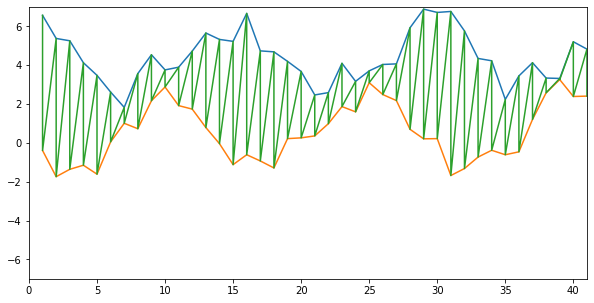

In [181]:
plt.figure(figsize=(10,5))
#first tide measurement/high tide
plt.plot(x1,z1)
#second tide measurement/low tide
plt.plot(x2,z2)

#main tide plot
plt.plot(x,z)

plt.axis([0, 41, -7, 7])